#**Machine Learning - Classificação**


A classificação é uma das tarefas mais fundamentais e amplamente utilizadas na análise de dados e aprendizado de máquina. Ela envolve atribuir rótulos ou categorias a instâncias de dados com base em suas características. Neste notebook, exploraremos três métodos distintos de classificação e examinaremos três algoritmos diferentes dentro de cada método. Nosso objetivo é entender a aplicação prática desses métodos e algoritmos, enfatizando a importância do pré-processamento de dados e as diversas maneiras de validar e medir a qualidade dos modelos resultantes.

In [1]:
import pandas as pd
import numpy as np
import zipfile

###**Importando os dados**

In [2]:
zf = zipfile.ZipFile('/content/Customer-Churn.zip')

dados = pd.read_csv(zf.open('Customer-Churn.csv'))

In [3]:
dados.shape

(7043, 18)

In [4]:
dados.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Maior65Anos              7043 non-null   int64  
 1   Conjuge                  7043 non-null   object 
 2   Dependentes              7043 non-null   object 
 3   MesesDeContrato          7043 non-null   int64  
 4   TelefoneFixo             7043 non-null   object 
 5   VariasLinhasTelefonicas  7043 non-null   object 
 6   ServicoDeInternet        7043 non-null   object 
 7   SegurancaOnline          7043 non-null   object 
 8   BackupOnline             7043 non-null   object 
 9   SeguroNoDispositivo      7043 non-null   object 
 10  SuporteTecnico           7043 non-null   object 
 11  TVaCabo                  7043 non-null   object 
 12  StreamingDeFilmes        7043 non-null   object 
 13  TipoDeContrato           7043 non-null   object 
 14  PagamentoOnline         

# **Data Preprocessing**

O pré-processamento de dados é uma etapa fundamental no processo de construção de modelos de aprendizado de máquina, incluindo classificação. Ele envolve a preparação e a limpeza dos dados brutos para que eles possam ser usados de maneira eficaz pelos algoritmos de classificação. Essa etapa é essencial para melhorar a qualidade e a confiabilidade dos resultados finais.

Vale ressaltar que o **pré-processamento não é uma abordagem única e constante**, mas sim um conjunto de ações que precisam ser ajustadas de acordo com os dados específicos, os algoritmos utilizados e a natureza da tarefa em mãos.

In [6]:
#Tradução de valores categóricos para numéricos, já que alguns algoritmos não lidam bem com essas informações.
traducao_dic  = {'Sim' :1 , 'Nao' : 0 }
dados_modificados = dados[[ 'Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(traducao_dic)
dados_modificados.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [7]:
# Transformação de valores categóricos usando one-hot encoding
dummie_dados  = pd.get_dummies(dados.drop(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'],
                axis=1))

# Combinação dos dados transformados
dados_final = pd.concat([dados_modificados, dummie_dados ], axis=1)

In [8]:
# Exibição das primeiras linhas dos dados finais
pd.set_option('display.max_columns', 39)
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0


##**Balanceamento dos dados**

Dados desbalanceados são aqueles que possuem muitos registros para uma categoria e poucos para outra. Se não balanceamos esses dados de alguma forma, eles podem acarretar em problemas na construção de modelos e na geração de previsões.

**Oversampling** é uma técnicas para realizar o balanceamento dos dados, que consiste em realizar a criação de novas observações da classe quando há menos amostras, tendo como objetivo igualar a proporção entre as categorias.

Uma das técnicas de oversampling muito utilizada é a **SMOTE**. Sua ideia consiste em criar observações intermediárias entre os dados que estão próximos. Por exemplo, se minutos totais por dia são 129.1 e 146.3, então será criada uma amostra com os minutos totais por dia com 137.7. Lembrando que não é necessariamente a média entre as amostras.

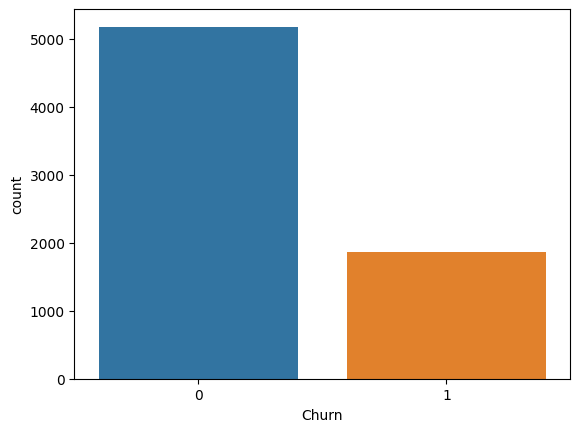

In [9]:
#variável target está desbalanceada
import seaborn as sns
%matplotlib inline
ax = sns.countplot(x='Churn', data=dados_final)

In [10]:
dados_final.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [11]:
#biblioteca para balancear os dados utilizando over_sampling
from imblearn.over_sampling import SMOTE

In [12]:
#dividindo os dados em caracteristicas e target
X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

In [13]:
smt = SMOTE(random_state=123)
X, y = smt.fit_resample(X, y)

In [14]:
#junção dos dados balanceados
dados_final = pd.concat([X, y], axis=1)

In [15]:
#verificação 1 - junção dos dados
dados_final.head(2)

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,1,0,0,1,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
1,0,0,1,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0


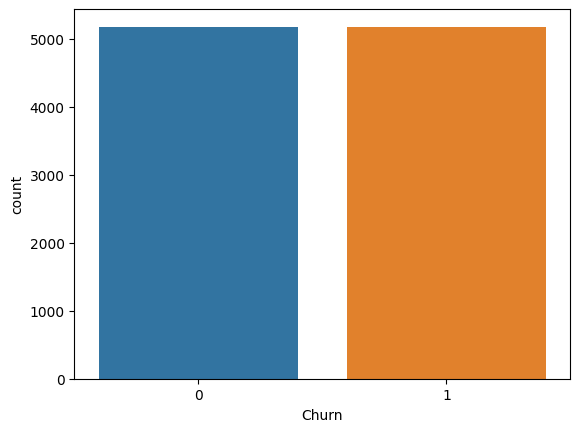

In [16]:
#verificação 2 - balanceamento
ax = sns.countplot(x='Churn', data=dados_final)

In [17]:
dados_final.Churn.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

#**Método baseado na proximidade**

##KNN - K Nearest Neighbors

O algoritmo K Nearest Neighbors (KNN) funciona da seguinte forma:

Quando recebe um novo dado, ele calcula as distâncias em relação aos outros dados presentes no conjunto de dados. A seguir, ele seleciona os K dados mais próximos com base nessas distâncias. Uma vez que esses K vizinhos mais próximos são identificados, o algoritmo examina a classe dominante entre esses vizinhos.  
 <br/>
Ajustar **o valor de K é essencial para obter bons resultados do modelo**. Um valor de K muito pequeno pode levar ao **overfitting**, ajustando-se excessivamente aos dados de entrada, o que não refletirá um resultado preciso para o problema. Por outro lado, um valor de K muito grande resulta em **underfitting**, onde o modelo considera um número excessivo de classes para análise, podendo não chegar à conclusão desejada.  

**Técnicas como a validação cruzada (Cross-Validation) podem auxiliar na determinação adequada de um valor K para o problema.**
 <br/>  <br/>
Além disso, o KNN é um algoritmo baseado em distâncias. Portanto, é fundamental para seu funcionamento receber **dados normalizados**. Isso ocorre porque uma coluna com dados variando de 0 a 10 terá menos influência do que outra coluna com valores variando de 0 a 1000, podendo distorcer a análise de similaridade entre os pontos.

In [18]:
#biblioteca para padronizar os dados/ normalização
from sklearn.preprocessing import StandardScaler

#Divisão em inputs e outputs
X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

In [19]:
norm = StandardScaler()

X_normalizado = norm.fit_transform(X)
X_normalizado

array([[ 1.26542767, -0.52771004, -3.06083934, ...,  1.30373042,
        -0.47912706, -0.4360152 ],
       [-0.79024667, -0.52771004,  0.32670777, ..., -0.76702973,
         2.08712905, -0.4360152 ],
       [-0.79024667, -0.52771004,  0.32670777, ..., -0.76702973,
         2.08712905, -0.4360152 ],
       ...,
       [-0.79024667, -0.52771004,  0.32670777, ...,  1.30373042,
        -0.47912706, -0.4360152 ],
       [-0.79024667, -0.52771004,  0.32670777, ..., -0.76702973,
        -0.47912706, -0.4360152 ],
       [-0.79024667, -0.52771004,  0.32670777, ..., -0.76702973,
        -0.47912706, -0.4360152 ]])

No KNN, temos a flexibilidade de escolher a medida de distância a ser usada pelo algoritmo para determinar os K pontos de dados mais próximos a um novo ponto de consulta. A medida de distância padrão é a distância euclidiana.

**Distância Euclidiana**

A distância euclidiana é expressa pela fórmula:

$$\sqrt{\sum_{i=1}^k(a_{i}-b_{i})^2}$$ <br/>


Isso se aplica a vários contextos, incluindo um plano bidimensional. Considere os pontos:

 $$P1 = [X1, Y1] \text{  e  } P2 = [X2, Y2]$$  <br/>


Dentro da fórmula da distância euclidiana, esses pontos seriam representados como:
  $$\sqrt{(X_{1}-X_{2})^2+(Y_{1}-Y_{2})^2}$$ <br/>

###**Implementando o modelo**

In [20]:
#biblioteca para divisão dos dados
from sklearn.model_selection import train_test_split

In [21]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_normalizado, y, test_size=0.2, random_state=123)

In [22]:
#biblioteca para criarmos o modelo de machine learning
from sklearn.neighbors import KNeighborsClassifier

#instanciar o modelo (criamos o modelo) - por padrão são 5 vizinhos
knn = KNeighborsClassifier(metric='euclidean')

In [23]:
#treinando o modelo com os dados de treino
knn.fit(X_treino, y_treino)

KNeighborsClassifier(metric='euclidean')

In [24]:
#testando o modelo com os dados de teste
predito_knn = knn.predict(X_teste)

In [25]:
predito_knn

array([1, 0, 0, ..., 0, 0, 0])

#**Método probabilístico**

##Modelo Bernoulli Naive Bayes
O Teorema de Bayes é uma fórmula fundamental utilizada para calcular a probabilidade condicional de um evento ocorrer, dado que outro evento relacionado já ocorreu. A notação padrão é P(A|B), que representa a probabilidade de o evento A acontecer, dado que o evento B já ocorreu. O teorema é definido pela seguinte equação:

 <br/>$${P(A|B) = \frac{P(B|A) * P(A)}{P(B)}}$$<br/>


*   **P(A | B)**  = probabilidade de A acontecer dado que B já aconteceu;<br/>
*   **P(B | A)**  = probabilidade de B acontecer dado que A já aconteceu;<br/>
*   **P(A)**    = probabilidade de A acontecer;<br/>
*   **P(B)**    = probabilidade de B acontecer;<br/>
<br/>

O modelo Bernoulli do Naive Bayes é uma aplicação prática desse teorema, especialmente útil quando lidamos com variáveis binárias (eventos que podem acontecer ou não), e assume a independência entre as variáveis, ou seja, que a ocorrência de uma variável não afeta a ocorrência das outras. Esse modelo é amplamente utilizado em tarefas de classificação e análise de texto, onde cada evento pode ser interpretado como a presença ou ausência de uma determinada característica.


###Exemplo:

Considere a seguinte tabela de probabilidades, onde há uma probabilidade de 15% de uma empresa ter um projeto em andamento e uma probabilidade de 85% de não ter. Para aquelas empresas que têm um projeto em andamento, a probabilidade de um relatório interno ser positivo é de 80%, enquanto a probabilidade de ser negativo é de 20%. Para empresas sem um projeto em andamento, a probabilidade de um relatório interno ser positivo é de 10%, enquanto a probabilidade de ser negativo é de 90%.

De posse dessas informações, qual é a probabilidade de uma empresa ter um projeto em andamento, dado que o relatório interno é positivo?

|  | Projeto em Andamento (15%) | Sem Projeto em Andamento (85%) |
|-------------|-------------|-------------|
| Relatório  positivo | 	80% | 10% |
| Relatório  Negativo | 20% | 90% |

<br/>

**Evento A**: Ter um Projeto em Andamento<br/>
**Evento B**: Relatório Positivo (evento condicionante)

* **P(B | A):** Probabilidade de o relatório ser positivo, dado que a empresa tem um projeto em andamento, é 80%.
* **P(A):** Probabilidade de uma empresa ter um projeto em andamento é 15%.
* **P(B):** Probabilidade do relatório ser positivo.

<br/>

A probabilidade P(B) não está diretamente disponível na tabela, porque o relatório positivo pode ocorrer tanto para empresas com projetos em andamento quanto para aquelas sem projetos (inclusive em situações em que o relatório está incorreto). Portanto, P(B) pode ser calculada da seguinte maneira:

<br/> $${P(B) = P(B|A) * P(A) + P(B|A^c) * P(A^c)}$$ <br/>

* **P(B|A^c):** Probabilidade de o relatório ser positivo, dado que a empresa não tem um projeto em andamento, é 10%.
* **P(A^c):** Probabilidade de uma empresa não ter um projeto em andamento é 85%.
Calculando: P(B) = 0.1575

<br/> $${P(A|B) = \frac{0.80 * 0.15}{0.1575} = 0.7619}$$ <br/>

**Portanto, a probabilidade de uma empresa ter um projeto em andamento, dado que o relatório interno é positivo, é de aproximadamente 76.19%.**

###**Implementando o modelo**

O uso do "binarize" é necessário para adaptar o algoritmo Bernoulli Naive Bayes a dados em formato float, transformando-os em binários (1 ou 0), já que esse algoritmo lida originalmente com características binárias. Isso permite aplicar o Bernoulli Naive Bayes a conjuntos de dados contínuos.

In [26]:
#biblioteca para criarmos o modelo de machine learning
from sklearn.naive_bayes import BernoulliNB

In [27]:
#escolho utilizar mediana, porque é o valor central dos nossos dados ordenados
np.median(X_treino)

-0.4461759755508453

In [28]:
#criamos o modelo passando a |mediana| como parametro
bnb = BernoulliNB(binarize=0.44)

In [29]:
bnb.fit(X_treino, y_treino)

BernoulliNB(binarize=0.44)

In [30]:
predito_BNb = bnb.predict(X_teste)

In [31]:
predito_BNb

array([1, 0, 0, ..., 0, 0, 0])

#**Método Simbólico**

###árvore de decisão

Uma Árvore de Decisão é um algoritmo usado em aprendizado de máquina para tomar decisões e fazer previsões. Funciona criando uma estrutura semelhante a uma árvore, onde cada nó representa uma escolha baseada em um atributo dos dados. Vamos percorrer alguns pontos-chave desse algoritmo.

No início, temos um nó raiz, que engloba todos os dados de treinamento. A ideia é dividir esses dados em grupos menores e mais homogêneos. Para isso, a árvore avalia diferentes atributos e calcula a impureza, que mede a mistura de classes nos subgrupos resultantes. Um cálculo comum de impureza é o **índice Gini**.

A árvore busca criar grupos que sejam o **mais homogêneos possível** em termos das classes que contêm. Um grupo homogêneo possui predominantemente uma única classe, tornando as decisões mais claras e precisas.

Pode usar a medida de entropia para avaliar a incerteza presente nos dados. A entropia ajuda a calcular o ganho de informação que uma divisão específica traz, auxiliando na escolha do melhor atributo para fazer a separação.

A árvore pode lidar tanto com dados categóricos quanto numéricos. Ela realiza testes diferentes dependendo do tipo de dado: comparação de categorias para dados categóricos e comparação de valores em relação a limites para dados numéricos.

**Overfitting** ocorre quando a árvore se ajusta muito aos dados de treinamento, incluindo variações irrelevantes. Isso prejudica o desempenho em novos dados. Para evitar isso, é possível **limitar a profundidade da árvore ou estabelecer critérios mínimos para a criação de folhas**.

Uma característica importante das árvores é a sua **instabilidade**. Pequenas mudanças nos dados de treinamento podem resultar em árvores completamente diferentes. Isso acontece porque a escolha dos atributos para dividir os dados é sensível à busca pela informação ganha ou pela redução da impureza.



####Formulas

#####**Índice Gini**

Este índice informa o grau de heterogeneidade dos dados. O objetivo dele é medir a frequência de um elemento aleatório de um nó ser rotulado de maneira incorreta. Em outros termos, esse índice é capaz de medir a impureza de um nó e ele é determinado por meio do seguinte cálculo:

alt text: Fórmula: Gini é igual a 1 menos somatório de i começando em 1 indo até K de P de i ao quadrado.

Onde:
$${Gini = 1 -\sqrt{ \sum_{i=1}^k P(i)^2}}$$ <br/>

pi representa a frequência relativa das classes em cada um dos nós;
k é o número de classes.
Se o índice Gini for igual a 0, isso indica que o nó é puro. No entanto, se o valor dele se aproxima mais do valor 1, o nó é impuro.

#####**Entropia**
A ideia básica da entropia é medir a desordem dos dados de um nó por meio da variável classificadora. Assim como o índice de Gini, ela é utilizada para caracterizar a impureza dos dados e pode ser calculada por meio da seguinte fórmula:

Alt text: Fórmula: Entropia de S, com S entre parênteses, é igual ao somatório de i iniciando em 1 até c de menos p subscrito i vezes o log 2 de p subscrito i.

Onde:
$${Entropia = \sum_{i=1}^C -P{i} * \log_2(P{i})}$$ <br/>

pi representa a proporção de dados no conjunto de dados (S), pertencentes à classe específica i;
c é o número de classes.


###**Implementando o modelo**

In [32]:
#biblioteca para criarmos o modelo de machine learning
from sklearn.tree import DecisionTreeClassifier

In [33]:
#instanciando o modelo
dtc = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [34]:
#treinar o modelo
dtc.fit(X_treino, y_treino)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [35]:
#verificar a importância de cada atributo
dtc.feature_importances_

array([0.02202571, 0.01665654, 0.00592052, 0.02398298, 0.01279923,
       0.16435807, 0.21804376, 0.01068483, 0.0031357 , 0.01099189,
       0.00046661, 0.03136172, 0.00033456, 0.00938854, 0.        ,
       0.01469435, 0.00698296, 0.        , 0.00880374, 0.00959265,
       0.        , 0.00802773, 0.01511449, 0.        , 0.01744348,
       0.00479762, 0.004339  , 0.00572454, 0.00737065, 0.00066151,
       0.01152269, 0.0374934 , 0.16160095, 0.07359084, 0.02099467,
       0.02458444, 0.01949108, 0.01701856])

In [36]:
predito_ArvoreDecisao = dtc.predict(X_teste)

In [37]:
predito_ArvoreDecisao

array([0, 0, 0, ..., 1, 0, 0])

#**Validação dos modelos**

##**Matriz de confusão**

 Uma matriz de confusão é uma ferramenta usada para avaliar o desempenho de um modelo de classificação. Ela mostra a relação entre as classificações reais e as previsões feitas pelo modelo.

 <br/>

|          | Classe Real Positiva | Classe Real Negativa |
|----------|----------------------|----------------------|
| Classe Prevista Positiva |Verdadeiro Positivo (VP)|Falso Positivo (FP)|
| Classe Prevista Negativa |Falso Negativo (FN)|Verdadeiro Negativo (VN)|

<br/>

Neste exemplo, as classificações são divididas em duas categorias: positiva e negativa. A matriz mostra quatro possíveis combinações de classificações: Verdadeiro Positivo (VP), Falso Positivo (FP), Falso Negativo (FN) e Verdadeiro Negativo (VN). Essa nomenclatura pode ser traduzida para o inglês substituindo a sigla de "Verdadeiro" (V) por "True" (T).

<br/>

* **Verdadeiro Positivo (VP / TP):** O modelo previu corretamente a classe como positiva, e a classe real também é positiva.
* **Falso Positivo (FP):** O modelo previu erroneamente a classe como positiva, mas a classe real é negativa.
* **Falso Negativo (FN):** O modelo previu erroneamente a classe como negativa, mas a classe real é positiva.
* **Verdadeiro Negativo (VN / TN):** O modelo previu corretamente a classe como negativa, e a classe real também é negativa.

<br/>

A matriz de confusão é útil para calcular várias métricas de avaliação, como acurácia, precisão, recall (taxa de verdadeiros positivos) e F1-score, que fornecem insights sobre o desempenho do modelo em diferentes aspectos da classificação.

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
print(confusion_matrix(y_teste, predito_knn))

[[848 214]
 [169 839]]


In [40]:
print(confusion_matrix(y_teste, predito_BNb))

[[740 322]
 [153 855]]


In [41]:
print(confusion_matrix(y_teste, predito_ArvoreDecisao))

[[852 210]
 [181 827]]


##Acurácia

A acurácia é uma métrica que mede a proporção de previsões corretas feitas pelo modelo em relação ao total de previsões. Ela é calculada dividindo o número de previsões corretas pelo número total de previsões.

<br/>$$ACC = {TP + TN \over TP + FP + TN + FN}$$<br/>

A acurácia reflete na qualidade do modelo quando as classes a serem classificadas têm uma distribuição aproximadamente equilibrada e quando tanto os falsos positivos quanto os falsos negativos têm um impacto semelhante.

 No entanto, a acurácia pode ser enganosa em situações em que as classes são desbalanceadas, ou seja, uma classe é muito mais comum do que a outra. Em tais casos, o modelo pode atingir uma alta acurácia simplesmente prevendo a classe majoritária o tempo todo, ignorando completamente a classe minoritária.


In [42]:
from sklearn.metrics import accuracy_score

In [43]:
#modelo KNN
acc_knn = accuracy_score(y_teste, predito_knn)
print(acc_knn)

0.8149758454106281


In [44]:
#modelo Bernoulli de naive bayes
acc_BNb = accuracy_score(y_teste, predito_BNb)
print(acc_BNb )

0.7705314009661836


In [45]:
#modelo árvore de decisão
acc_ArvoreDecisao = accuracy_score(y_teste, predito_ArvoreDecisao)
print(acc_ArvoreDecisao)

0.8111111111111111


##Precisão

A precisão é uma métrica que mede a proporção de previsões positivas corretas feitas pelo modelo em relação ao total de previsões positivas. Ela é calculada dividindo o número de verdadeiros positivos pelo total de previsões positivas (verdadeiros positivos mais falsos positivos).

<br/>$$PS = {TP \over TP + FP}$$<br/>


A precisão reflete na qualidade do modelo quando minimizar os falsos positivos é importante. Em situações onde prever incorretamente a classe positiva (falso positivo) tem um impacto significativo, a precisão é uma métrica útil para avaliar o desempenho do modelo.

No entanto, a precisão pode ser enganosa em casos de classes desbalanceadas, onde a classe negativa é predominante. Alcançar alta precisão pode ser relativamente fácil, mas isso pode ser às custas de uma alta taxa de falsos negativos, o que significa que algumas instâncias positivas são erroneamente classificadas como negativas.


In [46]:
from sklearn.metrics import precision_score

In [47]:
#modelo KNN
p_knn = precision_score(y_teste, predito_knn)
print(p_knn)

0.7967711301044634


In [48]:
#modelo Bernoulli de naive bayes
p_BNb = precision_score(y_teste, predito_BNb)
print(p_BNb)

0.7264231096006797


In [49]:
#modelo árvore de decisão
p_ArvoreDecisao = precision_score(y_teste, predito_ArvoreDecisao)
print(p_ArvoreDecisao)

0.7974927675988428


##Recall

O recall, também conhecido como taxa de verdadeiros positivos, revocação ou sensibilidade, que calcula o quão bom o modelo está para classificar corretamente um resultado positivo. Ele é calculado dividindo o número de verdadeiros positivos pelo total de verdadeiros positivos mais falsos negativos.

<br/>$$RC = {TP \over TP + FN}$$<br/>

O recall reflete na qualidade do modelo quando é crucial identificar a maioria das instâncias positivas, mesmo que isso resulte em um número maior de falsos positivos. Em situações em que prever todas as instâncias positivas é mais importante do que evitar alguns erros de falsa classificação, o recall é uma métrica valiosa.

No entanto, assim como acontece com a precisão, é importante equilibrar o recall com outras métricas e considerar o contexto do problema. Alcançar um recall muito alto pode resultar em uma maior taxa de falsos positivos, o que pode ser prejudicial em certos cenários. Portanto, a escolha da métrica depende dos objetivos e das implicações dos erros de classificação em um problema específico.




In [50]:
from sklearn.metrics import recall_score

In [51]:
#modelo KNN
r_knn = recall_score(y_teste, predito_knn)
print(r_knn)

0.8323412698412699


In [52]:
#modelo Bernoulli de naive bayes
r_BNb = recall_score(y_teste, predito_BNb)
print(r_BNb)

0.8482142857142857


In [53]:
#modelo árvore de decisão
r_ArvoreDecisao = recall_score(y_teste, predito_ArvoreDecisao)
print(r_ArvoreDecisao)

0.8204365079365079


##F1 score
O F1-score é uma métrica que combina a precisão e o recall de um modelo de classificação em uma única medida. Ele é especialmente útil quando há um desequilíbrio entre as classes ou quando os custos associados aos falsos positivos e falsos negativos são diferentes.

<br/>$$f1 = {2* {precisão * recall \over precisão + recall}}$$<br/>


O F1-score busca equilibrar a precisão e o recall, resultando em um valor que é sensível tanto a falsos positivos quanto a falsos negativos. Ele é particularmente útil em situações em que o foco é encontrar um equilíbrio entre identificar corretamente as instâncias positivas e evitar previsões incorretas.


In [54]:
from sklearn.metrics import f1_score

In [55]:
#modelo KNN
f1_knn = f1_score(y_teste, predito_knn)

In [56]:
#modelo Bernoulli de naive bayes
f1_BNb = f1_score(y_teste, predito_BNb)
print(f1_BNb)

0.782608695652174


In [57]:
#modelo árvore de decisão
f1_ArvoreDecisao = f1_score(y_teste, predito_ArvoreDecisao)
print(f1_ArvoreDecisao)

0.80880195599022


###Escolhendo o melhor modelo


Dado o foco de evitar a perda de clientes, ou seja, minimizar a quantidade de churns = 1, a métrica mais adequada para o problema é o recall.

O recall representa a proporção de instâncias positivas (churns) que são corretamente classificadas em relação ao total de instâncias positivas reais. Em resumo, ele quantifica a habilidade do modelo em identificar de forma precisa os clientes que realmente estão propensos a cancelar o serviço. No contexto de churn, é de suma importância reduzir os falsos negativos, garantindo que nenhum cliente prestes a cancelar seja deixado de fora da detecção.

In [58]:
print('Modelo KNN: ', r_knn)
print('Modelo Bernoulli de Naive Bayes: ', r_BNb)
print('Modelo Árvore de Decisão: ',  r_ArvoreDecisao)

Modelo KNN:  0.8323412698412699
Modelo Bernoulli de Naive Bayes:  0.8482142857142857
Modelo Árvore de Decisão:  0.8204365079365079


## Considerações Finais

Neste notebook, exploramos três métodos de classificação: KNN, Bernoulli Naive Bayes e Árvore de Decisão. Avaliamos o desempenho de cada modelo usando diversas métricas de avaliação, como acurácia, precisão, recall e F1-Score.

Com base nas métricas e considerando as características do problema, identificamos o modelo que apresentou melhor desempenho para a nossa tarefa específica. É importante ressaltar que a escolha do melhor modelo depende das particularidades do problema em questão, bem como das métricas mais relevantes para a aplicação e suas consequências.

O próximo passo seria a otimização dos hiperparâmetros dos modelos selecionados, com o objetivo de aprimorar ainda mais o desempenho. Essa etapa é crucial para garantir que os modelos estejam ajustados da melhor forma possível aos dados e ao contexto em que serão utilizados.
